In [10]:
# Libraries

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn

X.shape: (26, 2)


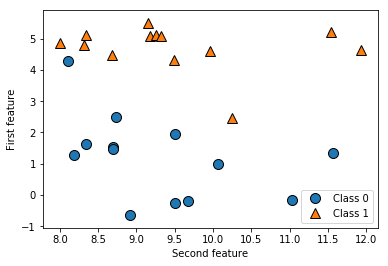

In [11]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend( ["Class 0", "Class 1"], loc = 4)
plt.ylabel( "First feature")
plt.xlabel( "Second feature" )
print("X.shape: {}".format(X.shape))

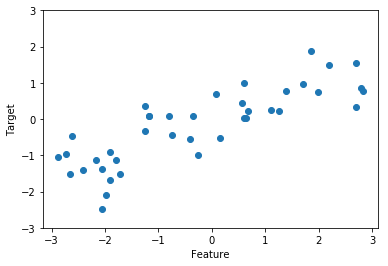

In [13]:
X, y = mglearn.datasets.make_wave( n_samples = 40 )
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print( "cancer.keys(); \n {0}".format(cancer.keys()) )

cancer.keys(); 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [15]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [16]:
print("Sample counts per classa:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per classa:
{'malignant': 212, 'benign': 357}


In [17]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [18]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [46]:
#
# k-NN Model Examples
#

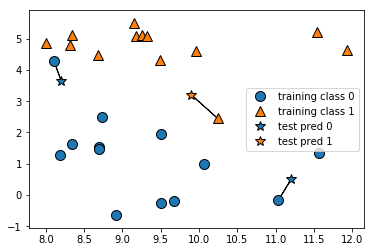

In [19]:
mglearn.plots.plot_knn_classification( n_neighbors = 1 )

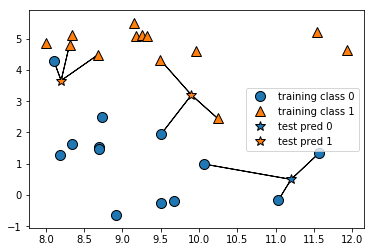

In [20]:
mglearn.plots.plot_knn_classification( n_neighbors = 3 )

In [21]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split( X, y, random_state = 0)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier( n_neighbors = 3 )

In [23]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [24]:
print("Test set predictions: {0}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [26]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


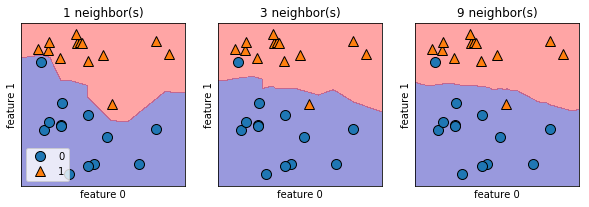

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip( [1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier( n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator( clf, X, fill = True, eps = 0.5, ax = ax, alpha = 0.4)
    mglearn.discrete_scatter( X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()

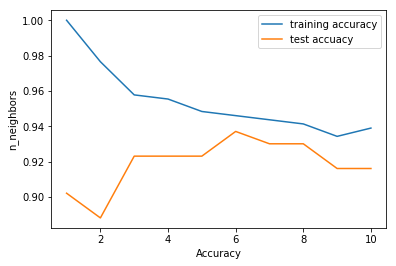

In [34]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier( n_neighbors = n_neighbors )
    clf.fit(X_train, y_train)
    # record accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append( clf.score(X_test, y_test) )
    
plt.plot( neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot( neighbors_settings, test_accuracy, label = "test accuacy")
plt.xlabel("Accuracy")
plt.ylabel("n_neighbors")
plt.legend()
plt.show()

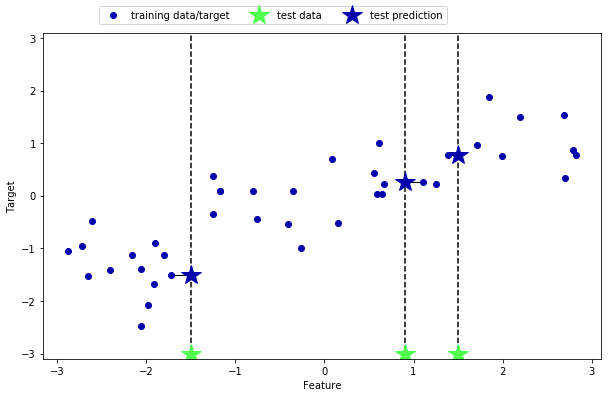

In [35]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

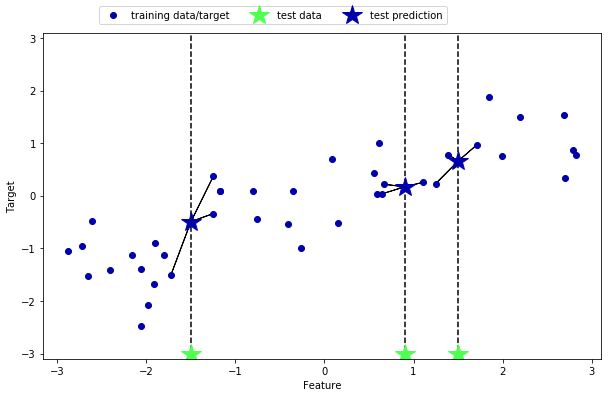

In [36]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [37]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave( n_samples = 40)

# split the wave dataset into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor( n_neighbors = 3)
# fit the model using the training data and training targets
reg.fit( X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [39]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [40]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


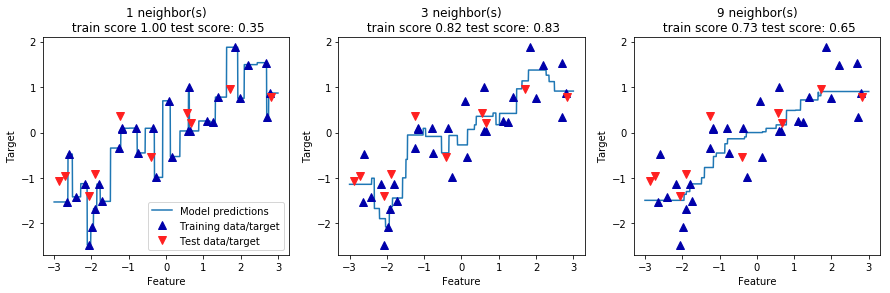

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000 ).reshape( -1, 1 )
for n_neighbors, ax in zip( [1,3,9], axes):
    # make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor( n_neighbors = n_neighbors )
    reg.fit(X_train, y_train)
    ax.plot( line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    
    ax.set_title(
        "{} neighbor(s)\n train score {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data/target",
               "Test data/target"], loc = "best")
plt.show()

In [47]:
#
# Linear Model Examples
#

w[0]: 0.393906  b: -0.031804


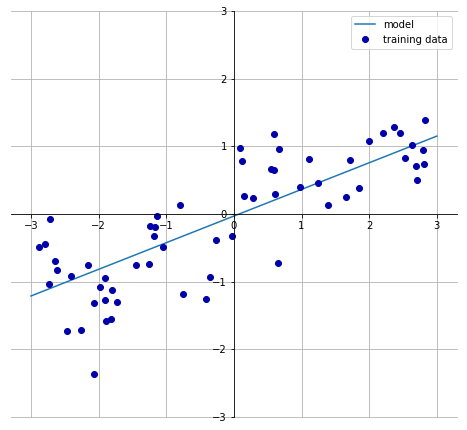

In [48]:
mglearn.plots.plot_linear_regression_wave()

In [ ]:
# Linear Regression

In [84]:
def score_model( model ):
    print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
    print("Test set score: {:.2f}".format(model.score(X_test, y_test)))
    print("Number of features used: {}".format(np.sum(model.coef_ != 0)))

In [86]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave( n_samples = 60 )
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

In [87]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept: {}".format(lr.intercept_))

lr.coef_: [ 0.39390555]
lr.intercept: -0.031804343026759746


In [88]:
score_model(lr)

Training set score: 0.67
Test set score: 0.66
Number of features used: 1


In [89]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split( X, y, random_state = 0 )
lr = LinearRegression().fit( X_train, y_train )
score_model(lr)

Training set score: 0.95
Test set score: 0.61
Number of features used: 104


In [55]:
# Ridge Regression

In [90]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit( X_train, y_train )
score_model( ridge )

Training set score: 0.89
Test set score: 0.75
Number of features used: 104


In [91]:
ridge10 = Ridge( alpha = 10 ).fit(X_train, y_train)
score_model( ridge10 )

Training set score: 0.79
Test set score: 0.64
Number of features used: 104


In [78]:
ridge01 = Ridge( alpha = 0.1).fit( X_train, y_train )
score_model( ridge01 )

Training set score: 0.93
Test set score: 0.77


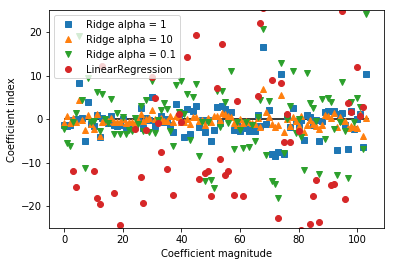

In [80]:
plt.plot( ridge.coef_, 's', label = "Ridge alpha = 1")
plt.plot( ridge10.coef_, '^', label = "Ridge alpha = 10")
plt.plot( ridge01.coef_, 'v', label = "Ridge alpha = 0.1")

plt.plot(lr.coef_, 'o', label = "LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient index")
plt.xlabel("Coefficient magnitude")
plt.hlines( 0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

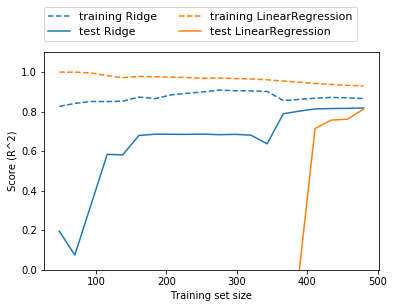

In [81]:
mglearn.plots.plot_ridge_n_samples()

In [92]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

score_model(lasso)

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [93]:
# we increase the default setting of "max_iter".
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso( alpha = 0.01, max_iter = 100000).fit(X_train, y_train)

score_model(lasso001)

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [95]:
lasso00001 = Lasso( alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)

score_model(lasso00001)

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


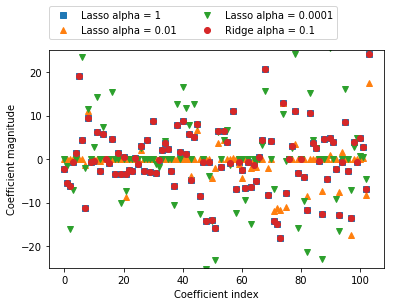

In [97]:
plt.plot(ridge01.coef_, 's', label = "Lasso alpha = 1")
plt.plot(lasso001.coef_, '^', label = "Lasso alpha = 0.01")
plt.plot(lasso0001.coef_, 'v', label = "Lasso alpha = 0.0001")

plt.plot(ridge01.coef_, 'o', label = "Ridge alpha = 0.1")
plt.legend(ncol = 2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

In [98]:
# Linear Classification

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


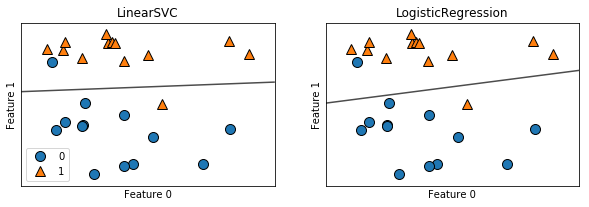

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axis = plt.subplots( 1, 2, figsize = (10, 3))

for model, ax in zip( [LinearSVC(), LogisticRegression( solver = 'liblinear' )], axis):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator( clf, X, fill = False, eps = 0.5,
                                   ax = ax, alpha = 0.7)
    mglearn.discrete_scatter( X[:,0], X[:, -1], y, ax = ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axis[0].legend()
plt.show()

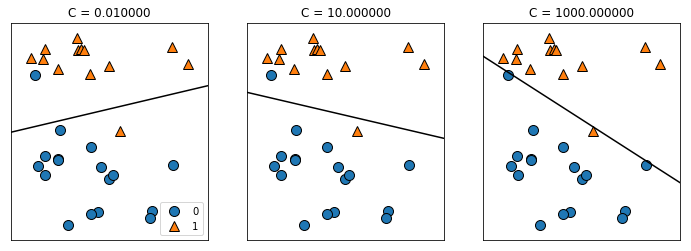

In [107]:
mglearn.plots.plot_linear_svc_regularization()

In [108]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

In [110]:
logreg = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)

score_model(logreg)

Training set score: 0.96
Test set score: 0.96
Number of features used: 30


In [113]:
logreg100 = LogisticRegression(solver = 'liblinear', C=100).fit(X_train, y_train)

score_model(logreg100)

Training set score: 0.97
Test set score: 0.97
Number of features used: 30


In [115]:
logreg001 = LogisticRegression(solver = 'liblinear', C=0.01).fit(X_train, y_train)

score_model(logreg001)

Training set score: 0.93
Test set score: 0.93
Number of features used: 30


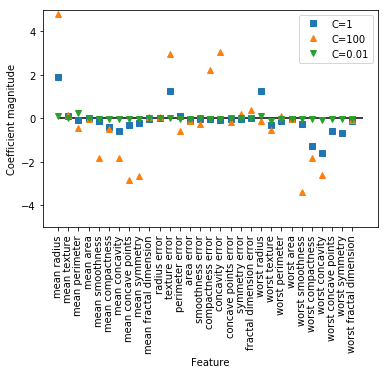

In [118]:
plt.plot(logreg.coef_.T, 's', label = "C=1")
plt.plot(logreg100.coef_.T, '^', label = "C=100")
plt.plot(logreg001.coef_.T, 'v', label = "C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


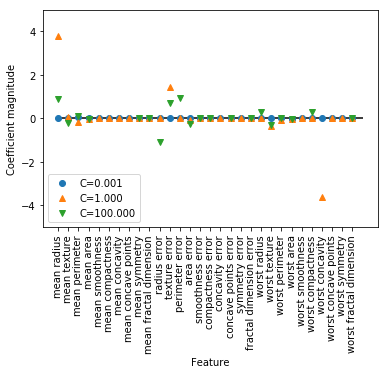

In [119]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression( solver = 'liblinear', C = C, penalty = "l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label ="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend(loc=3)
plt.show()

In [122]:
def model_shape(model):
    print("Coefficient shape: ", model.coef_.shape)
    print("Intersept shape: ", model.intercept_.shape)

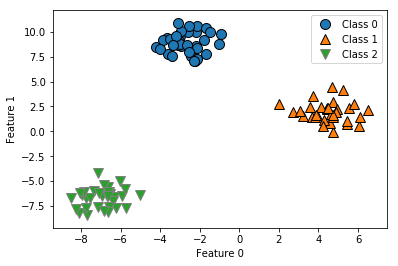

In [121]:
from sklearn.datasets import make_blobs

X, y = make_blobs( random_state = 42 )
mglearn.discrete_scatter( X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()

In [123]:
linear_svm = LinearSVC().fit(X, y)
model_shape(linear_svm)

Coefficient shape:  (3, 2)
Intersept shape:  (3,)


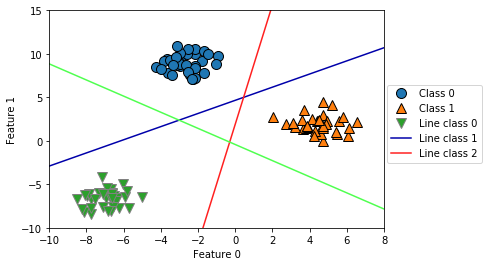

In [124]:
mglearn.discrete_scatter( X[:, 0], X[:, 1], y)
line = np.linspace( -15, 15 )
for coef, intercept, color in zip( linear_svm.coef_, linear_svm.intercept_,
                                 mglearn.cm3.colors):
    plt.plot( line, -(line * coef[0] + intercept) / coef[1], c = color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', "Class 1", "Line class 0", "Line class 1", 
            "Line class 2"], loc=(1.01, 0.3))
plt.show()

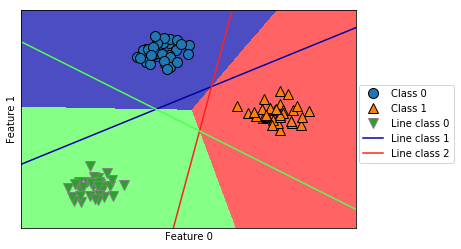

In [126]:
mglearn.plots.plot_2d_classification( linear_svm, X, fill = True, alpha = 0.7)
mglearn.discrete_scatter( X[:,0], X[:,1], y)

for coef, intercept, color in zip( linear_svm.coef_, linear_svm.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', "Class 1", "Line class 0", "Line class 1", 
            "Line class 2"], loc=(1.01, 0.3))
plt.show()

In [127]:
#
# Naive Bayes Classifiers
#

In [130]:
X = np.array([[0, 1, 0, 1],
            [1, 0, 1, 1],
            [0, 0, 0, 1],
            [1, 0, 1, 0]])
y = np.array( [0, 1, 0, 1] )

In [131]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[ label ] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}
